<a href="https://colab.research.google.com/github/OMONa-E/ML-Models/blob/main/ML_Models_Regression_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model (Regression and Classification) Task

> Author: Omona Emmanuel




##### Packages Import

In [1]:
import pandas as pd
# set pandas display to max column
pd.set_option('display.max_columns', 100)
import numpy as np
import missingno as msno
from google.colab import drive

##### Mount Dataset and Load/Read

In [2]:
# Mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
water_fpath = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/faulty_water_pump.csv'
water_lebel_fpath = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/faulty_water_pump_labels.csv'
wine_fpath = '/content/drive/MyDrive/CodingDojo/02-IntroML/Week07/Data/wines_SPA.csv'

# Read dataset
pump_df = pd.merge(pd.read_csv(water_fpath), pd.read_csv(water_lebel_fpath), on='id')
pump_df.set_index('id', inplace=True)

wine_df = pd.read_csv(wine_fpath)

## WINE PRICE /or QUALITY PREDICTION MODEL

### Dataset Description

In [5]:
# Dataset Information
display(wine_df.info(), wine_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


None

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


> This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. The datasets can be used for classification or regression tasks. The classes are ordered and not balanced (i.e. the quality goes from almost 5 to 4 points). `The task is to predict either the quality of wine or the prices using the given data.`

---
Target Vector: `price`
* Each row represents a ***Product***
* Our problem is a ***Regression*** task
> Our dataset have 7500 entries (rows) and 11 columns (Features)
* If any, challenges  I do foresee in cleaning.
---


**Attribute Information (Data Dictionary)**

winery: Winery name

wine: Name of the wine

year: Year in which the grapes were harvested

rating: Average rating given to the wine by the users [from 1-5]

num_reviews: Number of users that reviewed the wine

country: Country of origin [Spain]

region: Region of the wine

price: Price in euros [€]

type: Wine variety

body: Body score, defined as the richness and weight of the wine in your mouth [from 1-5]

acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]

> Source:
* fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

### EDA

In [6]:
# make a copy of dataset
wine_EDA_df = wine_df.copy()

In [7]:
# check for duplicates
wine_EDA_df.duplicated(keep=False).sum()

5503

In [8]:
# drop duplicates
wine_EDA_df.drop_duplicates(inplace=True)

# recheck for duplicates
wine_EDA_df.duplicated(keep=False).sum()

0

In [11]:
# cardinality check
wine_EDA_df.nunique()

winery          480
wine            847
year             71
rating            8
num_reviews     817
country           1
region           76
price          1292
type             21
body              4
acidity           3
dtype: int64

In [12]:
# features to be drop
drop_cols = [
    'year', # stakeholder can not change
    'country' # constant
]

# drop columns
wine_EDA_df.drop(columns=drop_cols, inplace=True)

In [13]:
# check missing values
wine_EDA_df.isnull().sum()

winery           0
wine             0
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [14]:
# type feature //categorical coulmn
wine_EDA_df['type'].fillna('MISSING', inplace=True)

# body feature //numeric column
wine_EDA_df['body'].fillna(wine_EDA_df['body'].mean(), inplace=True)

# acidity feature //numeric column
wine_EDA_df['acidity'].fillna(wine_EDA_df['acidity'].mean(), inplace=True)

# recheck for missing value
wine_EDA_df.isna().sum()

winery         0
wine           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [15]:
# inconsistency check
for item in wine_EDA_df.select_dtypes('object').columns:
  print(f'{wine_EDA_df[item].value_counts()}')
  print()

winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: count, Length: 480, dtype: int64

wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las Ig

#### Custom Function EDA Univariate

In [16]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show();

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show();


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


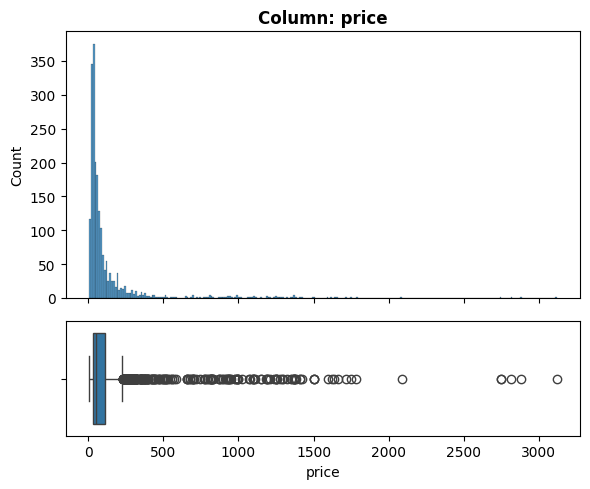

- NaN's Found: 0 (0.0%)
- Unique Values: 1292
- Most common value: '75.0' occurs 16 times (0.78%)
- Not constant or quasi-constant.


In [18]:
# EDA for target //price
explore_numeric(wine_EDA_df, x='price');

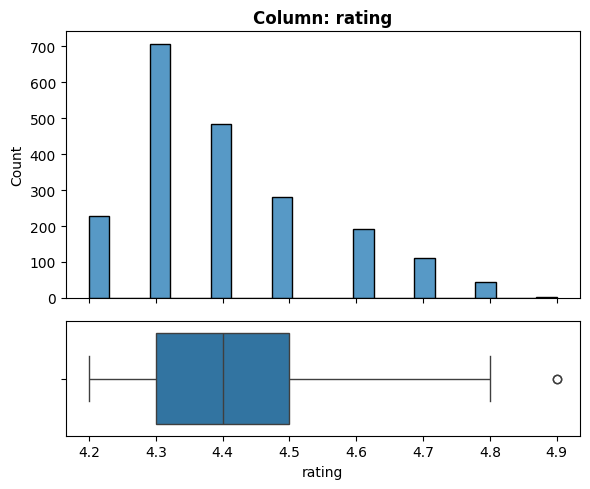

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '4.3' occurs 706 times (34.47%)
- Not constant or quasi-constant.



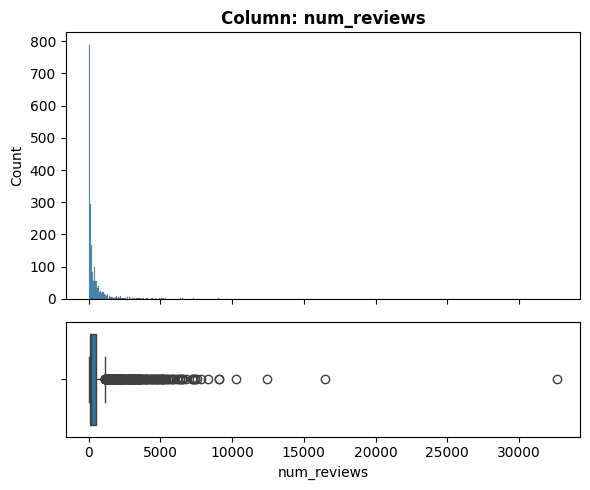

- NaN's Found: 0 (0.0%)
- Unique Values: 817
- Most common value: '28' occurs 29 times (1.42%)
- Not constant or quasi-constant.



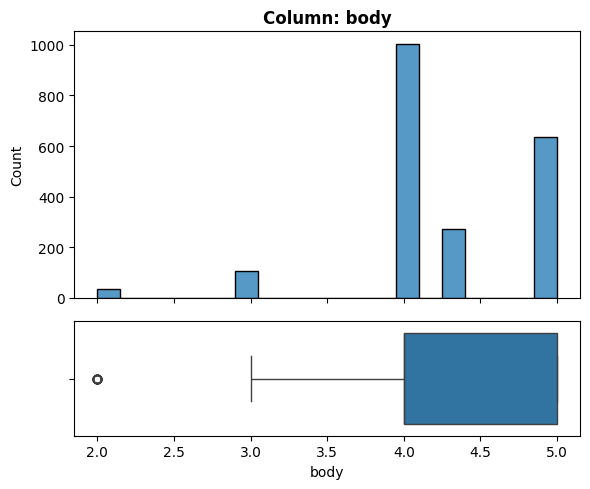

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: '4.0' occurs 1003 times (48.97%)
- Not constant or quasi-constant.



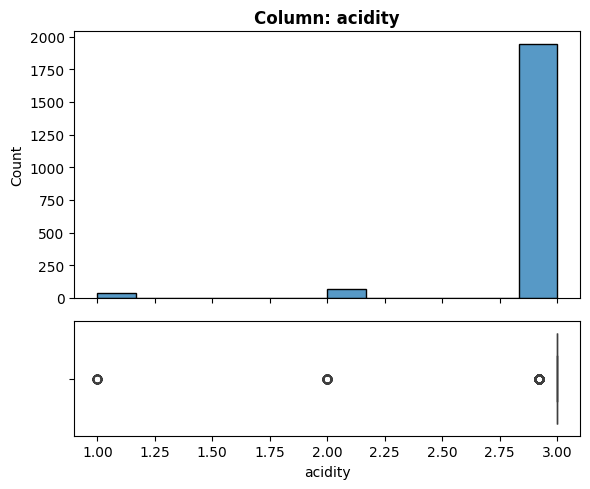

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: '3.0' occurs 1672 times (81.64%)
- Not constant or quasi-constant.



In [21]:
# EDA for other numeric features
for item in wine_EDA_df.select_dtypes('number').drop(columns='price').columns:
  explore_numeric(df=wine_EDA_df, x=item);
  print()

<ipython-input-16-b7f4cbb42ef9>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


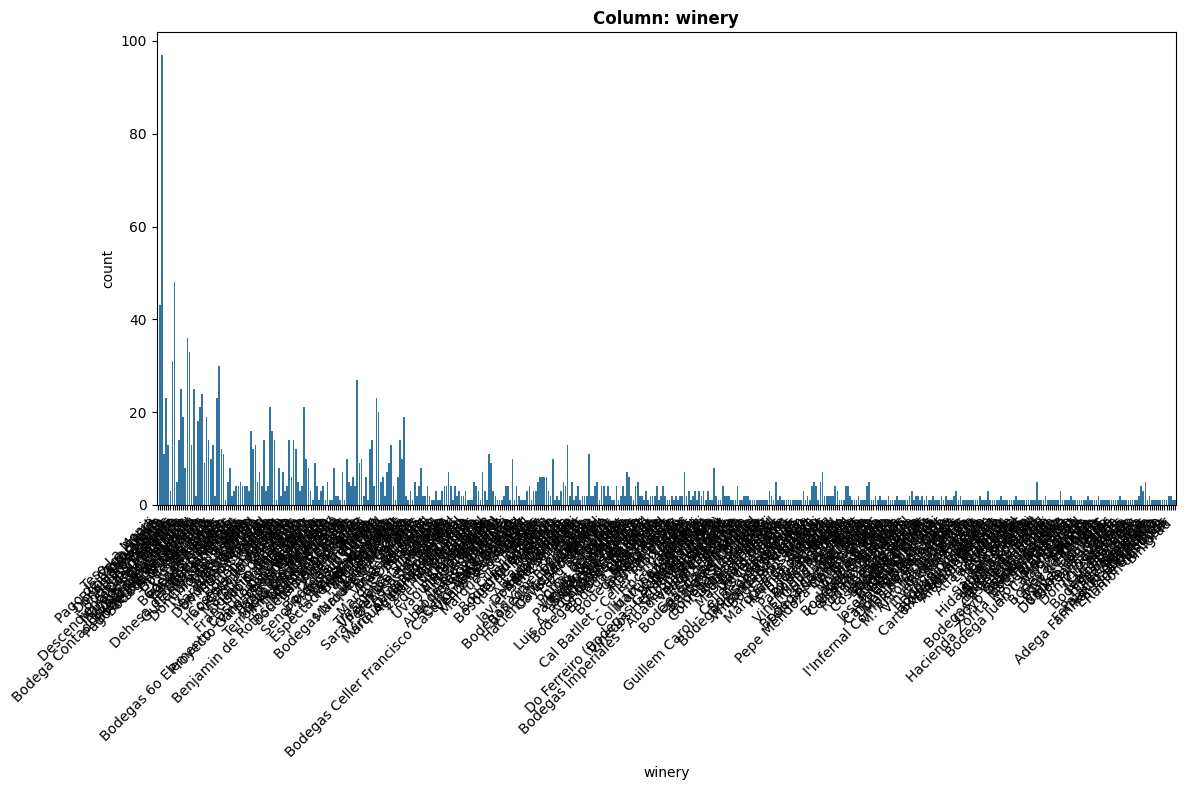

- NaN's Found: 0 (0.0%)
- Unique Values: 480
- Most common value: 'Vega Sicilia' occurs 97 times (4.74%)
- Not constant or quasi-constant.



<ipython-input-16-b7f4cbb42ef9>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


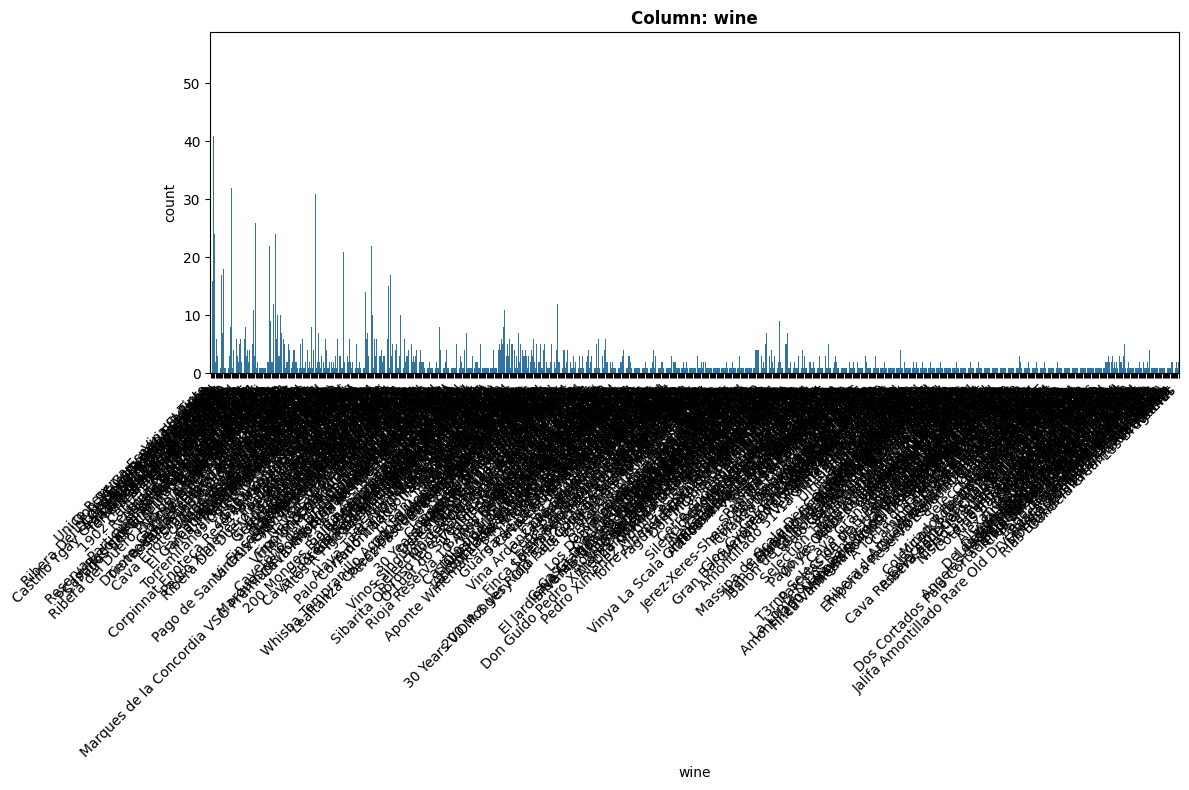

- NaN's Found: 0 (0.0%)
- Unique Values: 847
- Most common value: 'Tinto' occurs 56 times (2.73%)
- Not constant or quasi-constant.



<ipython-input-16-b7f4cbb42ef9>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


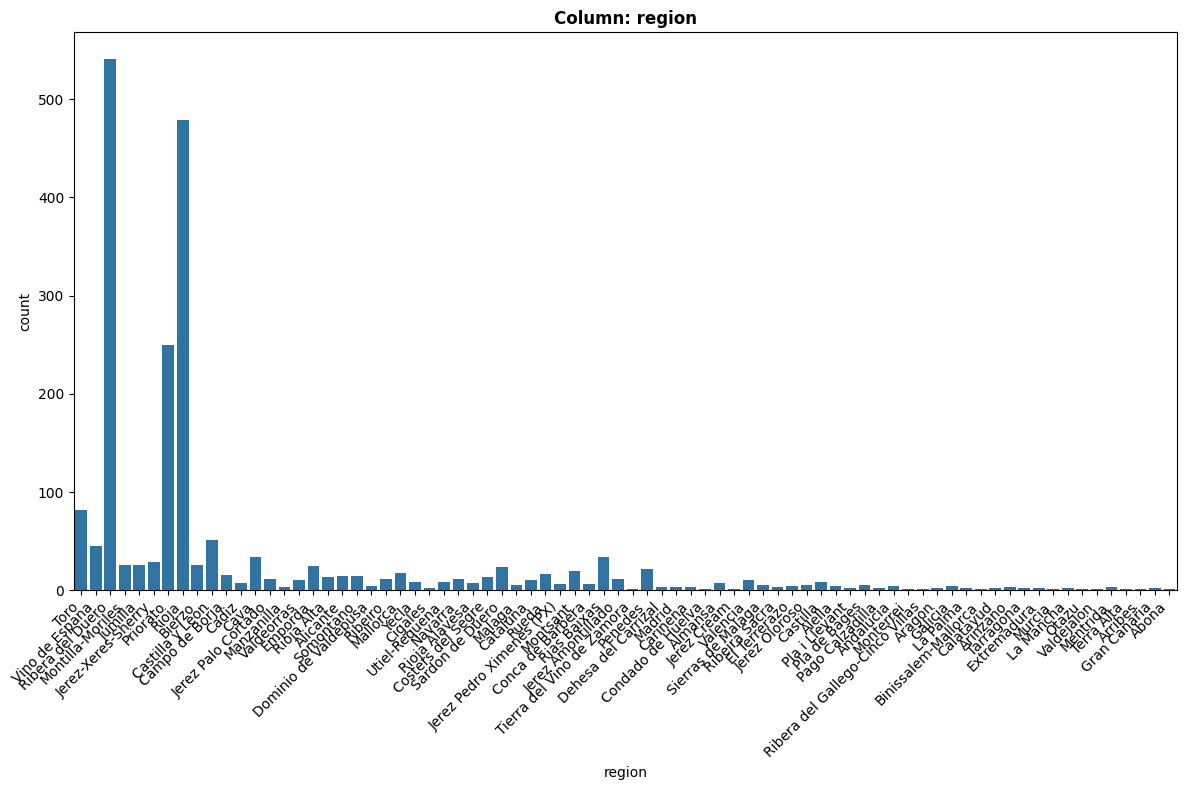

- NaN's Found: 0 (0.0%)
- Unique Values: 76
- Most common value: 'Ribera del Duero' occurs 541 times (26.42%)
- Not constant or quasi-constant.



<ipython-input-16-b7f4cbb42ef9>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


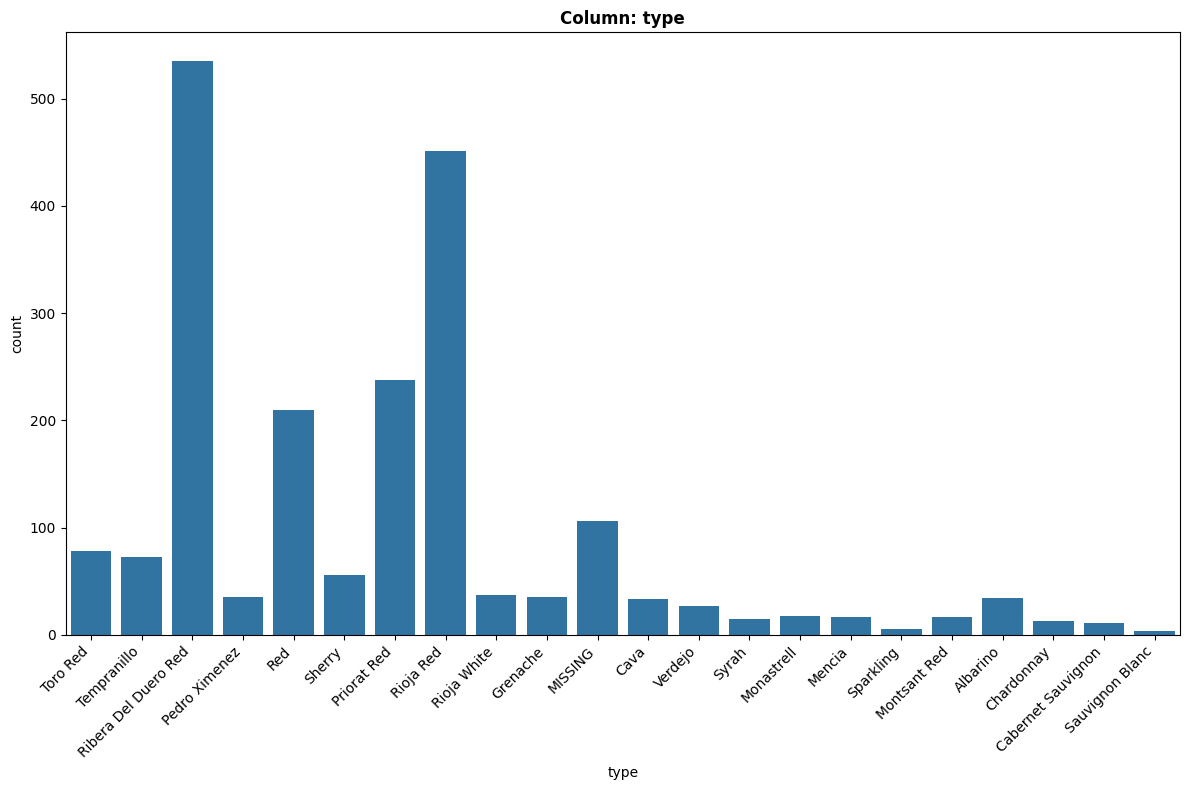

- NaN's Found: 0 (0.0%)
- Unique Values: 22
- Most common value: 'Ribera Del Duero Red' occurs 535 times (26.12%)
- Not constant or quasi-constant.



In [22]:
# EDA for categorical
for item in wine_EDA_df.select_dtypes('object').columns:
  explore_categorical(df=wine_EDA_df, x=item, figsize=(12, 8));
  print()

## WATER PUMP FUNCTIONAL /or FAULTY /or REPAIR PREDICTION MODEL

### Dataset Description

In [ ]:
# Dataset Information
display(pump_df.info(), pump_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55763 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59398 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  war

None

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


> This dataset is from Taarifa and the Tanzanian Ministry of Water. The dataset describes several metrics of water pump their effect on it's operation. The datasets can be used for classification tasks.`The task is to predict if a given water pumps is faulty using the given data.`

---
Target Vector: `status_group`
* Each row represents an ***Event***
* Our problem is a ***Classification*** task
> Our dataset have 59400 entries (rows) and 40 columns (Features)
* If any, challenges  I do foresee in cleaning and, exploring.
---


**Attribute Information (Data Dictionary)**

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded- The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private -is it private

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting- True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name- Who operates the waterpoint

permit- If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class- The kind of extraction the waterpoint uses

management- How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source- The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

> Acknowledgements:
* This Data is taken from the Driven Data website
Link to the competition : https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/